In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import sys
from tqdm import tqdm
import pickle

from PIL import Image




import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [8]:

DATADIR=sys.path[0]+"/Images"

CATEGORIES=np.arange(43)


In [25]:
training_data = []
IMG_SIZE = 80

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,str(category))  
        class_num=category
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()


NameError: name 'CATEGORIES' is not defined

In [27]:
import random

random.shuffle(training_data)


In [54]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

ValueError: cannot reshape array of size 6400 into shape (50,50,1)

In [36]:
'''

DO NOT RUN AGAIN

DO NOT RUN AGAIN

DO NOT RUN AGAIN

DO NOT RUN AGAIN


'''

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [2]:
import pickle
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [8]:
print(X.shape)

(39209, 80, 80, 1)


In [26]:
X=X/255.0


In [4]:
X=np.array(X)
y=np.array(y)


2


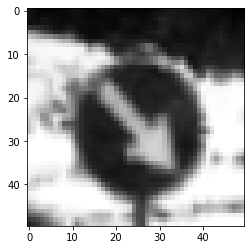

In [27]:
#print(X[0])
print(y[134])
IMG_SIZE=50
new_array = cv2.resize(X[7], (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [17]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [18]:
X_temp=X.copy()
y_temp=y.copy()
                                                                                                                                                                                                                                                                                                                                                                

In [19]:
from sklearn.model_selection import train_test_split


In [20]:

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.33)
y_train = to_categorical(y_train, 43)                                                                                                                                                                                                                                                                                                                                                                                                                                
y_val = to_categorical(y_val, 43)



In [21]:
X_train.shape[1:]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

(80, 80, 1)

In [22]:

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))


2021-10-09 13:31:44.165983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-09 13:31:44.166483: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-09 13:31:44.166606: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-09 13:31:44.166681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-09 13:31:44.166753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:

history = model.fit_generator(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


TypeError: fit_generator() got an unexpected keyword argument 'batch_size'

In [28]:
model.save("./training/TSR.h5")


In [30]:
model = load_model('./'+"model.h5")

In [43]:
import pandas as pd
from sklearn.metrics import accuracy_score

data_dir=sys.path[0]+"/data"
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

IMG_SIZE=80
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img,cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        X_use=new_array 
        X_use = np.array(X_use).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
        use=X_use.copy()    
        use=use.reshape(-1,80,80,1)
        # image_fromarray = Image.fromarray(image, 'RGB')
        # resize_image = image_fromarray.resize((IMG_SIZE, IMG_SIZE))
        data.append(np.array(use))
    except:
        print("Error in " + img)


# #pred = model.predict_classes(X_test)
# predict_x=model.predict(X_test)    
# Y_pred=classes_x=np.argmax  (predict_x,axis=1)  
# pred=Y_pred
# #Accuracy with the test data
# print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

In [57]:
print(data[0].shape)
X_test = np.array(data)
X_test = X_test/255
print(X_test.shape)


i=900
#pred = model.predict_classes(X_test)
predict_x=model.predict(data[i])    
Y_pred=classes_x=np.argmax  (predict_x,axis=1)  
pred=Y_pred
#Accuracy with the test data
#print('Test Data accuracy: ',accuracy_score(labels, pred)*100)
image=data[i]
plot,prediction=use,Y_pred  
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("---------------------PREDICTION------------------")
print("Predicted traffic sign is ",a)
# new_arraytemp = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
# plt.imshow(new_arraytemp, cmap='gray')
# plt.show()

true_prediction=0
false_prediction=0
for i in range(0,len(data)):
    pass
    predict_x=model.predict(data[i])    
    Y_pred=classes_x=np.argmax  (predict_x,axis=1)  
    pred=Y_pred
    #Accuracy with the test data
    #print('Test Data accuracy: ',accuracy_score(labels, pred)*100)
    image=data[i]
    plot,prediction=use,Y_pred  
    s = [str(i) for i in prediction] 
    a = int("".join(s))
    if(a==labels[i]):
        true_prediction+=1
    else:
        false_prediction+=1
    pass

print(true_prediction/len(data))

(1, 80, 80, 1)
(12630, 1, 80, 80, 1)
---------------------PREDICTION------------------
Predicted traffic sign is  11
0.9054631828978622


In [59]:
print("test accuracy=",true_prediction/len(data) *100,"%")

test accuracy= 90.54631828978621 %
